In [83]:
from collections import defaultdict
from nltk.corpus import stopwords
from wordcloud import WordCloud
import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sys
sys.path.append('../')

from src.config import *

stop = set(stopwords.words('english'))

data_url = f'{DATA_FOLDER_PATH_PROCESSED}/data_consolidated.xlsx'
df = pd.read_excel(data_url)

In [84]:
df.head(10)

,Request ID,Title,Product Name,Length,Language,Title_Processed,Title_Translated,Tags
0,1130253,Rerun workflow and Create workflow option not ...,"RE (Petrel RE, DELFI RE, ECLIPSE, INTERSECT, O...",2,en,Rerun workflow and Create workflow option not ...,Rerun workflow and Create workflow option not ...,option workflow
1,1130796,SH-PED: Patch Log4j for proSource 2018.3,"ProSource, InnerLogix",2,en,SH PED: Patch for proSource .,SH PED : Patch for proSource .,patch prosource
2,1131191,SH-PED: issue with ProSource services,"ProSource, InnerLogix",2,en,SH PED: issue with ProSource services,SH PED : issue with ProSource services,prosource services
3,1131193,SH-PED: ProSource new License file,"ProSource, InnerLogix",3,en,SH PED: ProSource new License file,SH PED : ProSource new License file,file license prosource
4,1135119,Production by zone/segment,"RE (Petrel RE, DELFI RE, ECLIPSE, INTERSECT, O...",3,en,Production by zone segment,Production by zone segment,production segment zone
5,1136751,data exchanger with client,Petrel,3,en,data exchanger with client,data exchanger with client,client data exchanger
6,1140517,"Error: Unable to start external queue, but run...","RE (Petrel RE, DELFI RE, ECLIPSE, INTERSECT, O...",3,en,"Error: Unable to start external queue, but run...","Error : Unable to start external queue , but r...",external locally queue
7,1144906,unable to run simulation jobs on the cluster,"Engine Ecosystem, Sim Cluster Mgr.",3,en,unable to run simulation jobs on the cluster,unable to run simulation jobs on the cluster,cluster jobs simulation
8,1146411,Collocated co-kriging incertidumbre,Petrel,3,en,Collocated co kriging incertidumbre,Collocated co kriging incertidumbre,collocated incertidumbre kriging
9,1146787,units in techlog 2020.1.3,Techlog,2,en,units in techlog ..,units in techlog ..,techlog units


In [85]:
def create_corpus(df, col):
    corpus = []

    for x in tqdm.tqdm(df[col].str.split()):
        if x == x:
            for i in x:
                corpus.append(i)

    return corpus

100%|██████████| 114873/114873 [00:00<00:00, 1788265.16it/s]


<BarContainer object of 30 artists>

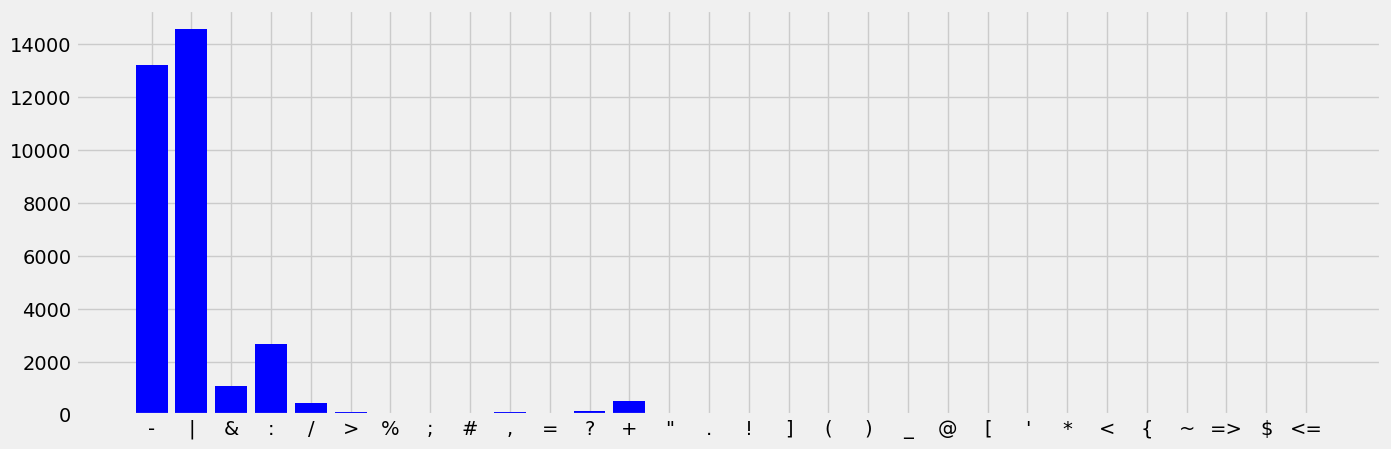

In [86]:
import string

corpus = create_corpus(df, 'Title')
plt.figure(figsize=(15,5))

dic = defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
x,y = zip(*dic.items())
plt.bar(x,y, color = 'blue')

100%|██████████| 114873/114873 [00:00<00:00, 2336909.34it/s]


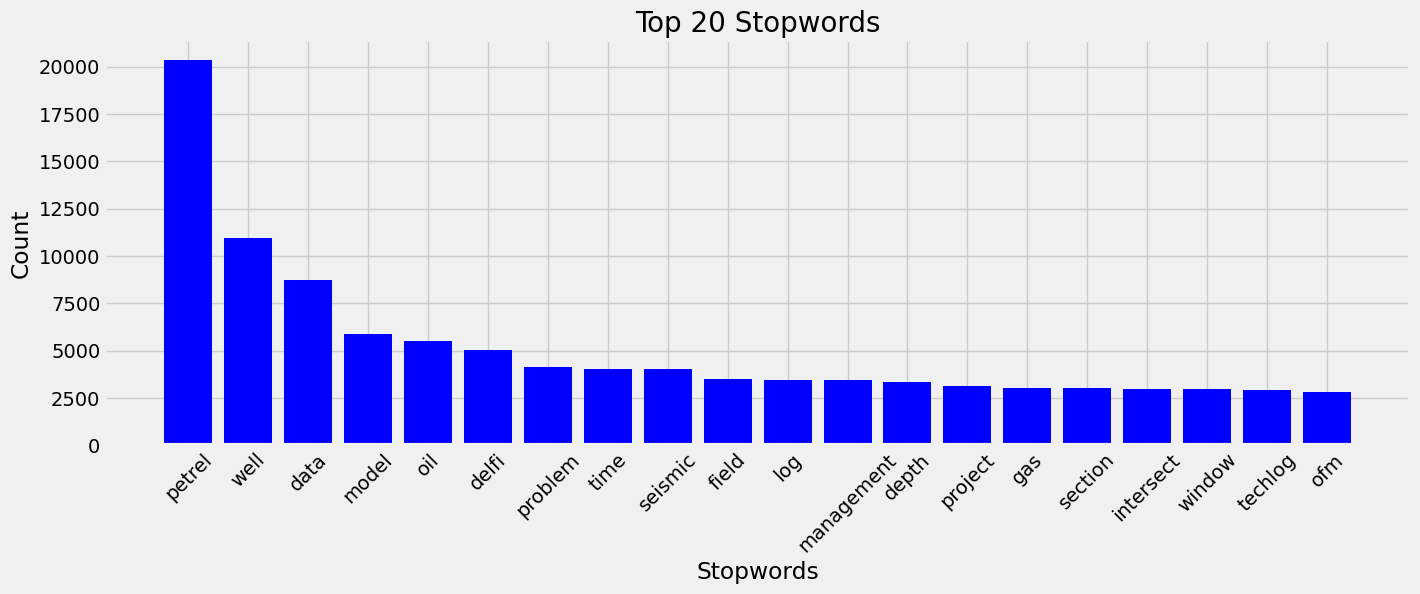

In [89]:
corpus = create_corpus(df, 'Tags')

dic = defaultdict(int)
for word in corpus:
    if word not in stop:
        dic[word] += 1
        
top_n = 20 
top = sorted(dic.items(), key=lambda x:x[1], reverse=True)[:top_n]

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')
x, y = zip(*top)
plt.bar(x, y, color = 'blue')
plt.title(f'Top {top_n} Stopwords', fontsize = 20)
plt.xlabel('Stopwords')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

100%|██████████| 114873/114873 [00:00<00:00, 1816144.67it/s]


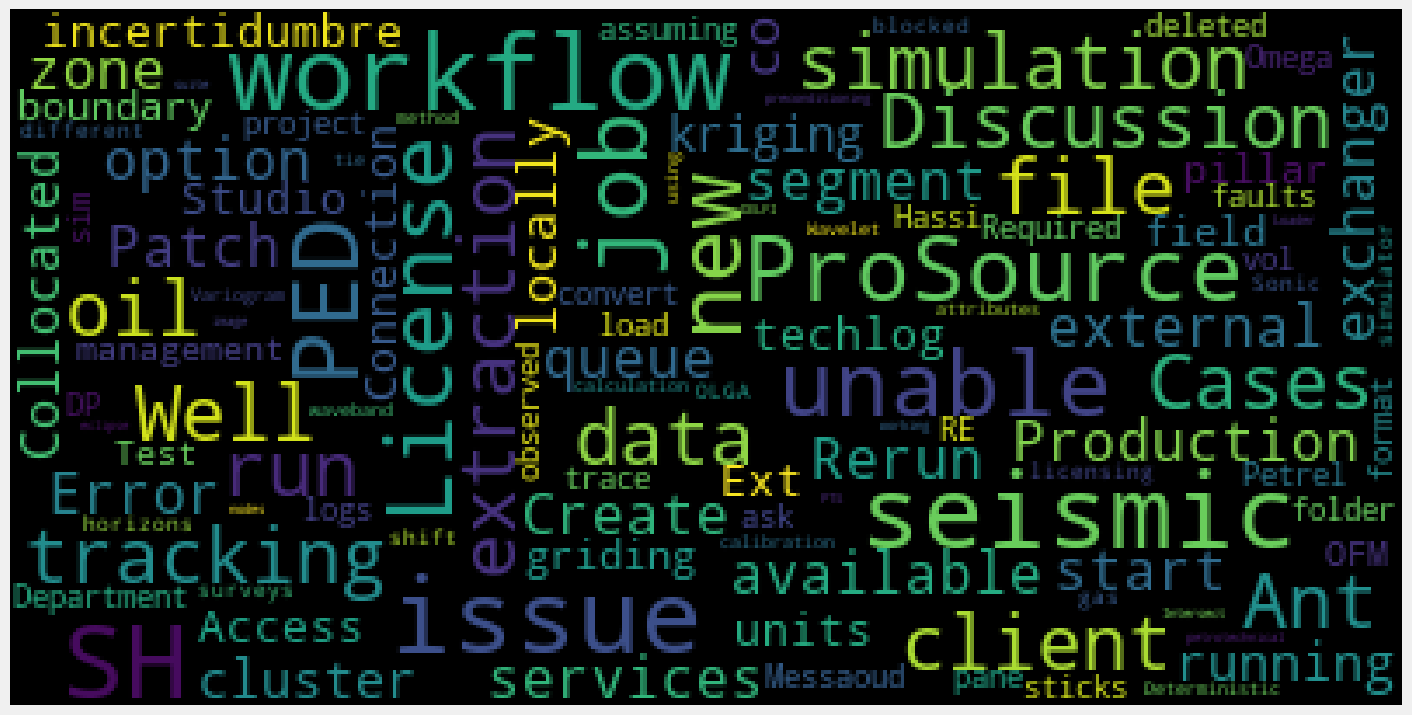

In [90]:
corpus = create_corpus(df, 'Title_Translated')

plt.figure(figsize=(16,12))
word_cloud = WordCloud(
                        background_color='black',
                        max_font_size = 30
                        ).generate(" ".join(corpus[:200]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

100%|██████████| 114873/114873 [00:00<00:00, 1986699.12it/s]


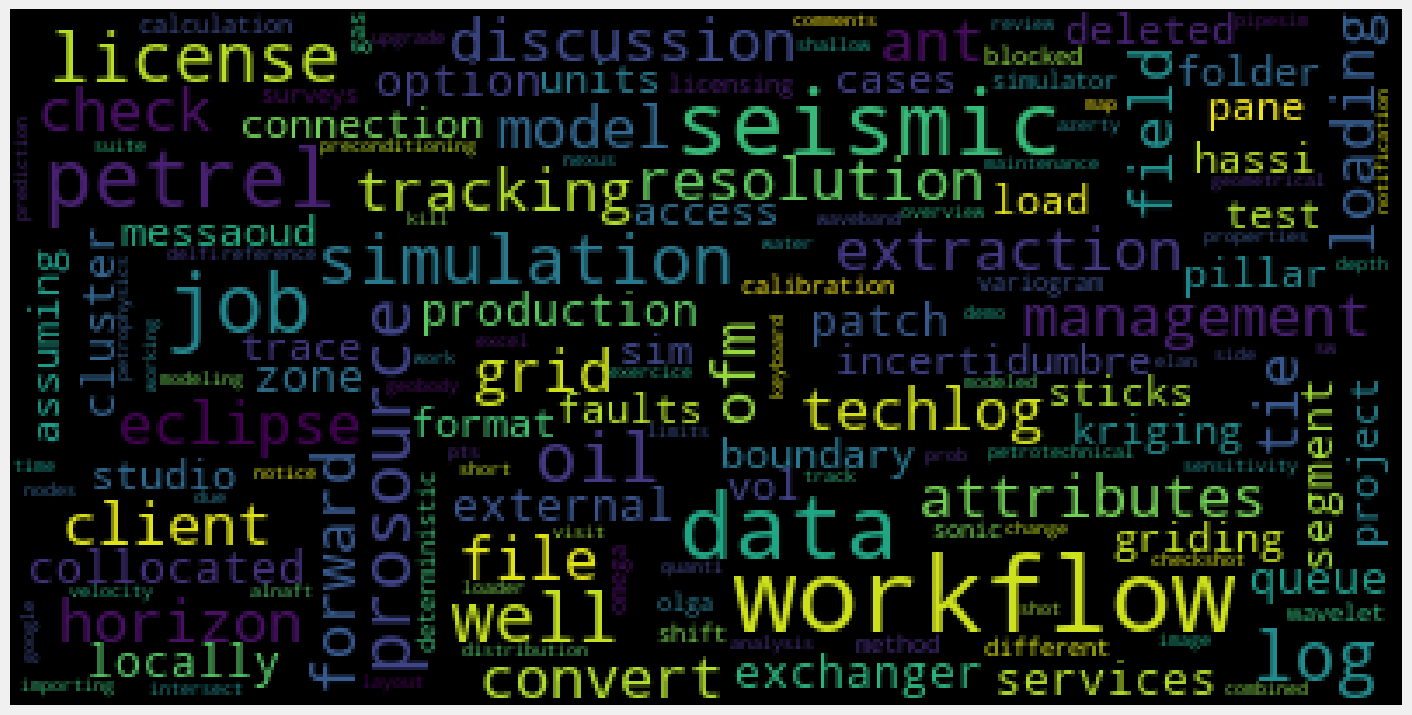

In [91]:
corpus = create_corpus(df, 'Tags')

plt.figure(figsize=(16,12))
word_cloud = WordCloud(
                        background_color='black',
                        max_font_size = 30
                        ).generate(" ".join(corpus[:200]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()